# Hard Voting

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
# Import packages
import pyforest

In [97]:
%matplotlib inline

In [98]:
print(sklearn.__version__)

0.22.1


In [99]:
bank_data = pd.read_csv('C:/Users/Vidush/Desktop/Dataset/bank-loan-modelling/Bank_Personal_Loan_Modellings.csv')

In [100]:
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [101]:
bank_data.shape

(5000, 14)

In [102]:
bank_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [103]:
bank_data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [104]:
bank_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [105]:
bank_data = bank_data.drop(['ID', 'Experience', 'ZIP Code','CCAvg', 'Personal Loan'], axis=1)

In [106]:
bank_data.head()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1,0,1,0,0,0
1,45,34,3,1,0,1,0,0,0
2,39,11,1,1,0,0,0,0,0
3,35,100,1,2,0,0,0,0,0
4,35,45,4,2,0,0,0,0,1


In [107]:
bank_data_corr = bank_data.corr()

bank_data_corr

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Age,1.000000,-0.055269,-0.046418,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681
Income,-0.055269,1.000000,-0.157501,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.157501,1.000000,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588
Education,0.041334,-0.187524,0.064929,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,0.206806,-0.020445,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231
Securities Account,-0.000436,-0.002616,0.019994,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.169738,0.014110,0.013934,0.089311,0.317034,1.000000,0.175880,0.278644
Online,0.013702,0.014206,0.010354,-0.015004,-0.005995,0.012627,0.175880,1.000000,0.004210
CreditCard,0.007681,-0.002385,0.011588,-0.011014,-0.007231,-0.015028,0.278644,0.004210,1.000000


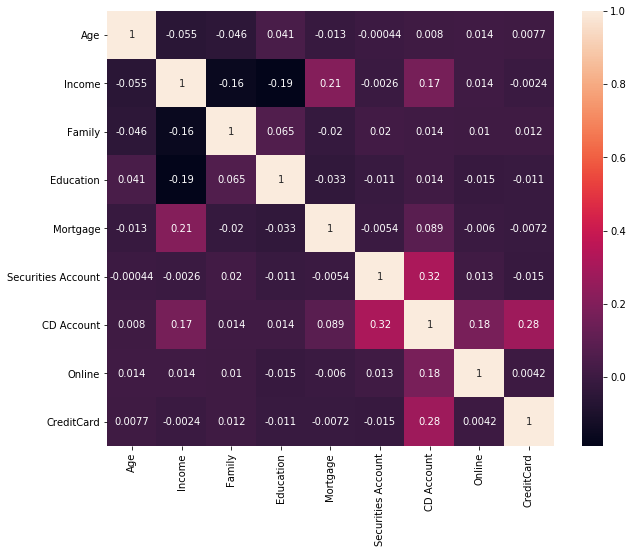

In [108]:
plt.figure(figsize =(10, 8))

sns.heatmap(bank_data_corr , annot=True)

In [109]:
X = bank_data.drop('CreditCard', axis=1)

Y = bank_data['CreditCard']

In [110]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [111]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [112]:
log = LogisticRegression(C=1 , solver='liblinear')
svc = SVC()
naive = GaussianNB()

In [113]:
for algorithm in (log, svc, naive):
    algorithm.fit(x_train, y_train)
    y_pred = algorithm.predict(x_test)
    
    print(algorithm.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.726
SVC 0.695
GaussianNB 0.726


In [114]:
voting_hard = VotingClassifier(estimators=[('lr', log), ('svc', svc),('naive', naive)], 
                              voting='hard')

In [115]:
voting_hard.estimators

[('lr',
  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('svc',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)),
 ('naive', GaussianNB(priors=None, var_smoothing=1e-09))]

In [116]:
voting_hard.named_estimators

{'lr': LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 'svc': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'naive': GaussianNB(priors=None, var_smoothing=1e-09)}

In [117]:
voting_hard.fit(x_train, y_train)
y_pred = voting_hard.predict(x_test)

In [118]:
accuracy_score(y_test, y_pred)

0.726

In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83       695
           1       0.76      0.15      0.25       305

    accuracy                           0.73      1000
   macro avg       0.74      0.56      0.54      1000
weighted avg       0.74      0.73      0.65      1000



In [120]:
print(confusion_matrix(y_test, y_pred))

[[681  14]
 [260  45]]


In [121]:
for algorithm in (log, svc, naive, voting_hard):
    algorithm.fit(x_train, y_train)
    y_pred = algorithm.predict(x_test)
    
    print(algorithm.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.726
SVC 0.695
GaussianNB 0.726
VotingClassifier 0.726


# Soft Voting

In [122]:
y_pred_probs = log.predict_proba(x_test)
y_pred_probs[:5]

array([[0.76763123, 0.23236877],
       [0.74896751, 0.25103249],
       [0.71390355, 0.28609645],
       [0.6961764 , 0.3038236 ],
       [0.76195748, 0.23804252]])

In [123]:
y_pred_probs = naive.predict_proba(x_test)
y_pred_probs[:5]

array([[0.87948496, 0.12051504],
       [0.88582237, 0.11417763],
       [0.88203572, 0.11796428],
       [0.8745002 , 0.1254998 ],
       [0.87634815, 0.12365185]])

In [124]:
# To get the probability value
svc_soft = SVC(C=1, kernel='linear', gamma='auto', probability=True)

In [128]:
voting_soft = VotingClassifier(estimators=[('lr', log), ('svc', svc_soft),('naive', naive)], 
                              voting='soft',
                              weights = [0.40, 0.30, 0.30]) #weights assigned to individual predictors to find the weighted average of class probabilities

In [129]:
for algo_soft in (log, svc_soft, naive, voting_soft):
    algo_soft.fit(x_train, y_train)
    y_pred = algo_soft.predict(x_test)
    
    print(algo_soft.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.726
SVC 0.726
GaussianNB 0.726
VotingClassifier 0.726
